Implement the guess game

In [159]:
from typing import TypedDict, List, Optional
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
import random

In [160]:
class AgentState(TypedDict):
    guess: int
    guesses: List[int]
    player_name: str
    lower_bound: int
    upper_bound: int
    attempts: int
    is_guessed: int

In [161]:
def setup(state: AgentState) -> AgentState:
    """ This state agent node initializes the initial values for the guess game """

    state['is_guessed'] = 0
    print("Number to guess: ", state['guess'])
    state['player_name'] = f"Welcome, {state['player_name']}! The game has begun. I'm thinking of a number between 1 and 20."
    print(state['player_name'])
    return state

def guess_node(state: AgentState) -> AgentState:
    """ This state agent node guesses the right number """

    num = random.randint(state['lower_bound'], state['upper_bound'])
    state['attempts']+=1
    print("Guessed number: ", num, "Attempts: ", state['attempts'], "LowerBound: ", state['lower_bound'], 
          "UpperBound: ", state['upper_bound'])
    if num == state['guess']:
        state['is_guessed'] = 1
    else:
        state['lower_bound'] = state['guess'] - 10
        state['upper_bound'] = state['guess'] + 10
    return state

def hint_router(state: AgentState) -> Optional[str]:
    """ This state agent node hints the guess node what number to guess """

    if state['is_guessed']:
        print("Corrrect")
        return "exit"
    elif state['attempts'] > 7:
        print("Max attempts reached, exiting now")
        return "exit"
    else:
        print("Incorrect")
        return "continue"
    
    

In [162]:
graph = StateGraph(AgentState)
graph.add_node(node="setup", action=setup)
graph.add_node(node="guess_node", action=guess_node)

graph.add_edge(start_key=START, end_key="setup")
graph.add_edge(start_key="setup", end_key="guess_node")

graph.add_conditional_edges(
    source="guess_node",
    path=hint_router,
    path_map={
        "continue": "guess_node",
        "exit": END
    }
)
app = graph.compile()

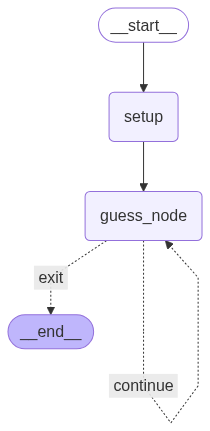

In [163]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [164]:
answer = app.invoke({
    "guess": random.randint(1, 20),
    "player_name": "Student",
    "attempts": 0,
    "lower_bound": 0,
    "upper_bound": 20
})
answer

Number to guess:  8
Welcome, Student! The game has begun. I'm thinking of a number between 1 and 20.
Guessed number:  16 Attempts:  1 LowerBound:  0 UpperBound:  20
Incorrect
Guessed number:  -1 Attempts:  2 LowerBound:  -2 UpperBound:  18
Incorrect
Guessed number:  1 Attempts:  3 LowerBound:  -2 UpperBound:  18
Incorrect
Guessed number:  0 Attempts:  4 LowerBound:  -2 UpperBound:  18
Incorrect
Guessed number:  17 Attempts:  5 LowerBound:  -2 UpperBound:  18
Incorrect
Guessed number:  -1 Attempts:  6 LowerBound:  -2 UpperBound:  18
Incorrect
Guessed number:  8 Attempts:  7 LowerBound:  -2 UpperBound:  18
Corrrect


{'guess': 8,
 'player_name': "Welcome, Student! The game has begun. I'm thinking of a number between 1 and 20.",
 'lower_bound': -2,
 'upper_bound': 18,
 'attempts': 7,
 'is_guessed': 1}